In [94]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error


Model Evaluation Metrics:
Train MSE: 8.576246289721338e-05, Train RMSE: 0.009260802497473606, Train R-squared: 0.005526372532349555
Test MSE: 6.146530895192006e-05, Test RMSE: 0.007839981438238235, Test R-squared: 0.0019909941085300975
Correlation between y_test and y_test_pred: 0.06406498832393191


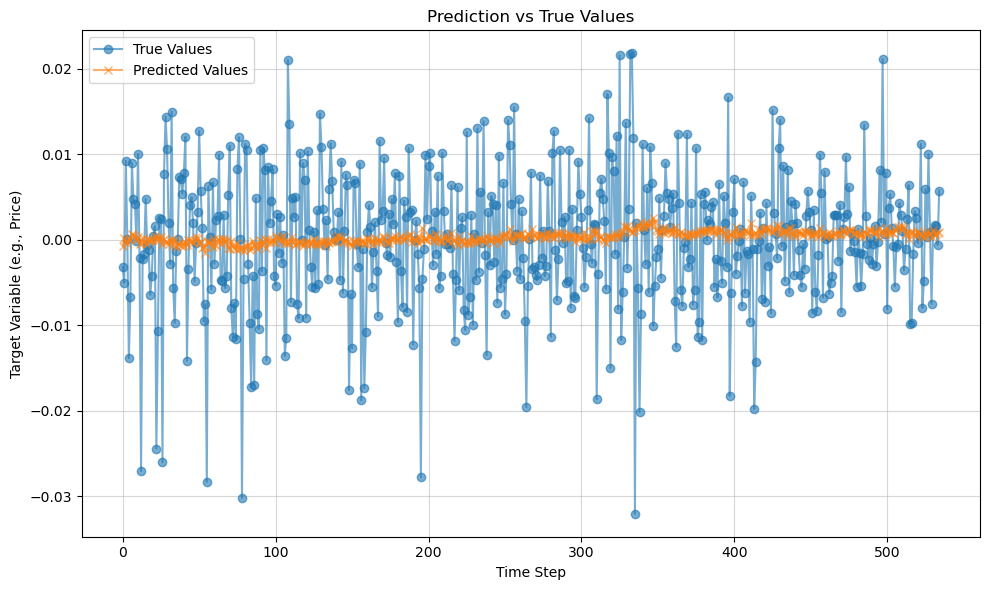

In [100]:
# Load the dataset
file_path = 'pcanewss.xlsx'
data = pd.read_excel(file_path)

# Define features (X) and target variable (y)
X = data[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']]
y = data['logreturn']  # Use log return as the target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Time series split: first 80% for training, last 20% for testing
split_index = int(0.8 * len(data))
X_train_scaled, X_test_scaled = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate correlation between actual and predicted values for the test set
correlation = np.corrcoef(y_test, y_test_pred)[0, 1]

# Print evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Train MSE: {train_mse:}, Train RMSE: {train_rmse:}, Train R-squared: {train_r2:}")
print(f"Test MSE: {test_mse:}, Test RMSE: {test_rmse:}, Test R-squared: {test_r2:}")
print(f"Correlation between y_test and y_test_pred: {correlation:}")

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot true values (y_test) and predicted values (y_test_pred)
plt.plot(y_test.values, label="True Values", linestyle='-', marker='o', alpha=0.6)
plt.plot(y_test_pred, label="Predicted Values", linestyle='-', marker='x', alpha=0.6)

# Add labels, legend, and title
plt.xlabel("Time Step")
plt.ylabel("Target Variable (e.g., Price)")
plt.title("Prediction vs True Values")
plt.legend()

# Show grid and layout
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
